In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = "retina"
from matplotlib import rcParams
rcParams["font.size"] = 14

import numpy as np
import pandas as pd
import radvel
from radvel.plot import orbit_plots
from rv_obs_sim.simGrid import SimGrid

%load_ext autoreload
%autoreload 2

In [28]:
sys_name = 'hip8152'
fit_config_id = 'base' # Name of config file used for comparison to baseline values
real = True

if real:
    data_file = f'{sys_name}/{sys_name}_rv.csv'
else:
    data_file = None

if real:
    moc_grid = np.arange(0, 31)
else:
    moc_grid = np.arange(1, 31)
nrv_grid = np.arange(10, 101)

base_config_file = f'{sys_name}/{sys_name}_base_config.py'
fit_config_file = f'{sys_name}/{sys_name}_{fit_config_id}_config.py'

sim_grid = SimGrid(moc_grid, nrv_grid, base_config_file, fit_config_file,
                         sys_name=sys_name,
                         config_id=fit_config_id,
                         data_file=data_file,
                         read_csv_kwargs={'comment':'#'},
                         random_seed=266)

In [29]:
ksim_grid = sim_grid.get_ksim_grid(save_posts=True)

100%|██████████████████████████████████████████| 31/31 [51:56<00:00, 100.52s/it]


In [30]:
ksim_over_ktruth = sim_grid.get_ksim_over_ktruth()
ksim_minus_ktruth_over_kerr = sim_grid.get_ksim_minus_ktruth_over_kerr()

In [49]:
import os
output_dir = os.path.join(sys_name, config_id)

In [50]:
# K sim over k truth grid
data_fname = os.path.join(output_dir, f'{sys_name}_real_grid_{config_id}_config_ksim_over_ktruth.npy')
np.save(data_fname, sim_grid.ksim_over_ktruth)

# K sim minus k truth over K truth error grid
data_fname = os.path.join(output_dir, f'{sys_name}_real_grid_{config_id}_config_diff_over_sigma.npy')
np.save(data_fname, sim_grid.ksim_minus_ktruth_over_kerr)

fname = os.path.join(output_dir, f'{sys_name}_real_grid_{config_id}_post_objects.npy')
np.save(fname, sim_grid.post_grid, allow_pickle=True)

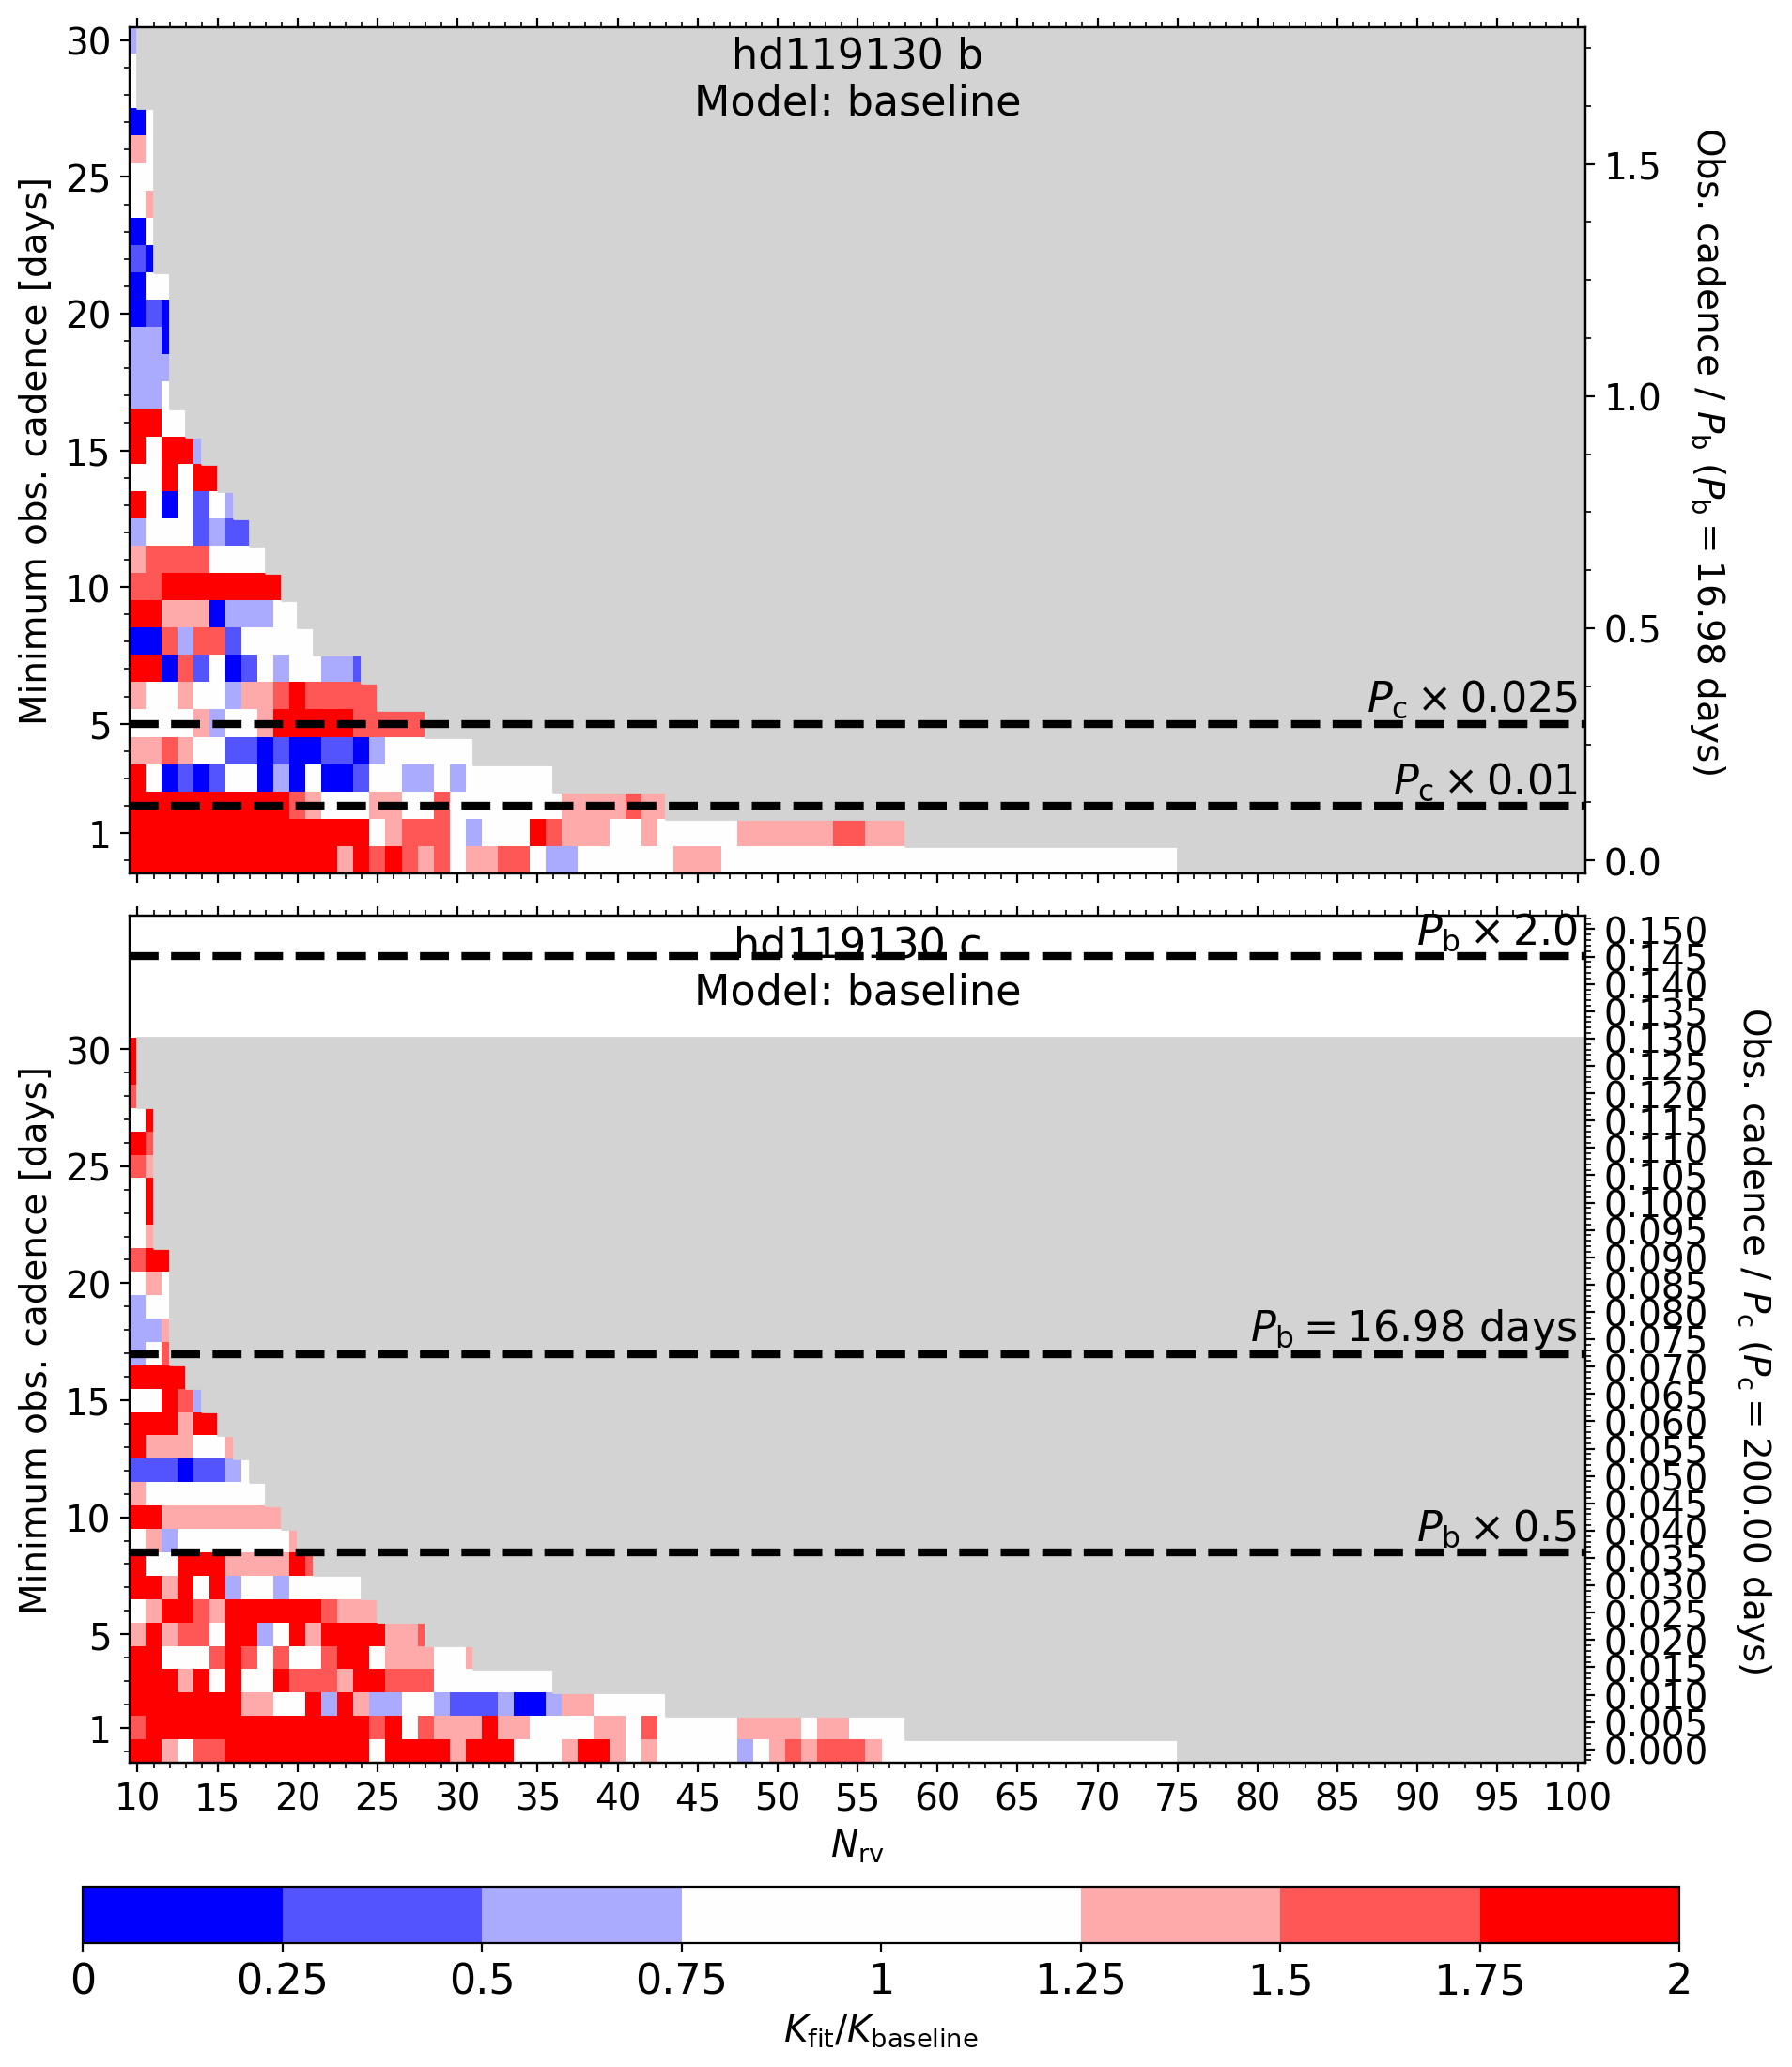

In [31]:
fig_arr, axes_arr = sim_grid.make_grid_plot(ksim_over_ktruth, cbar_units='ratio')

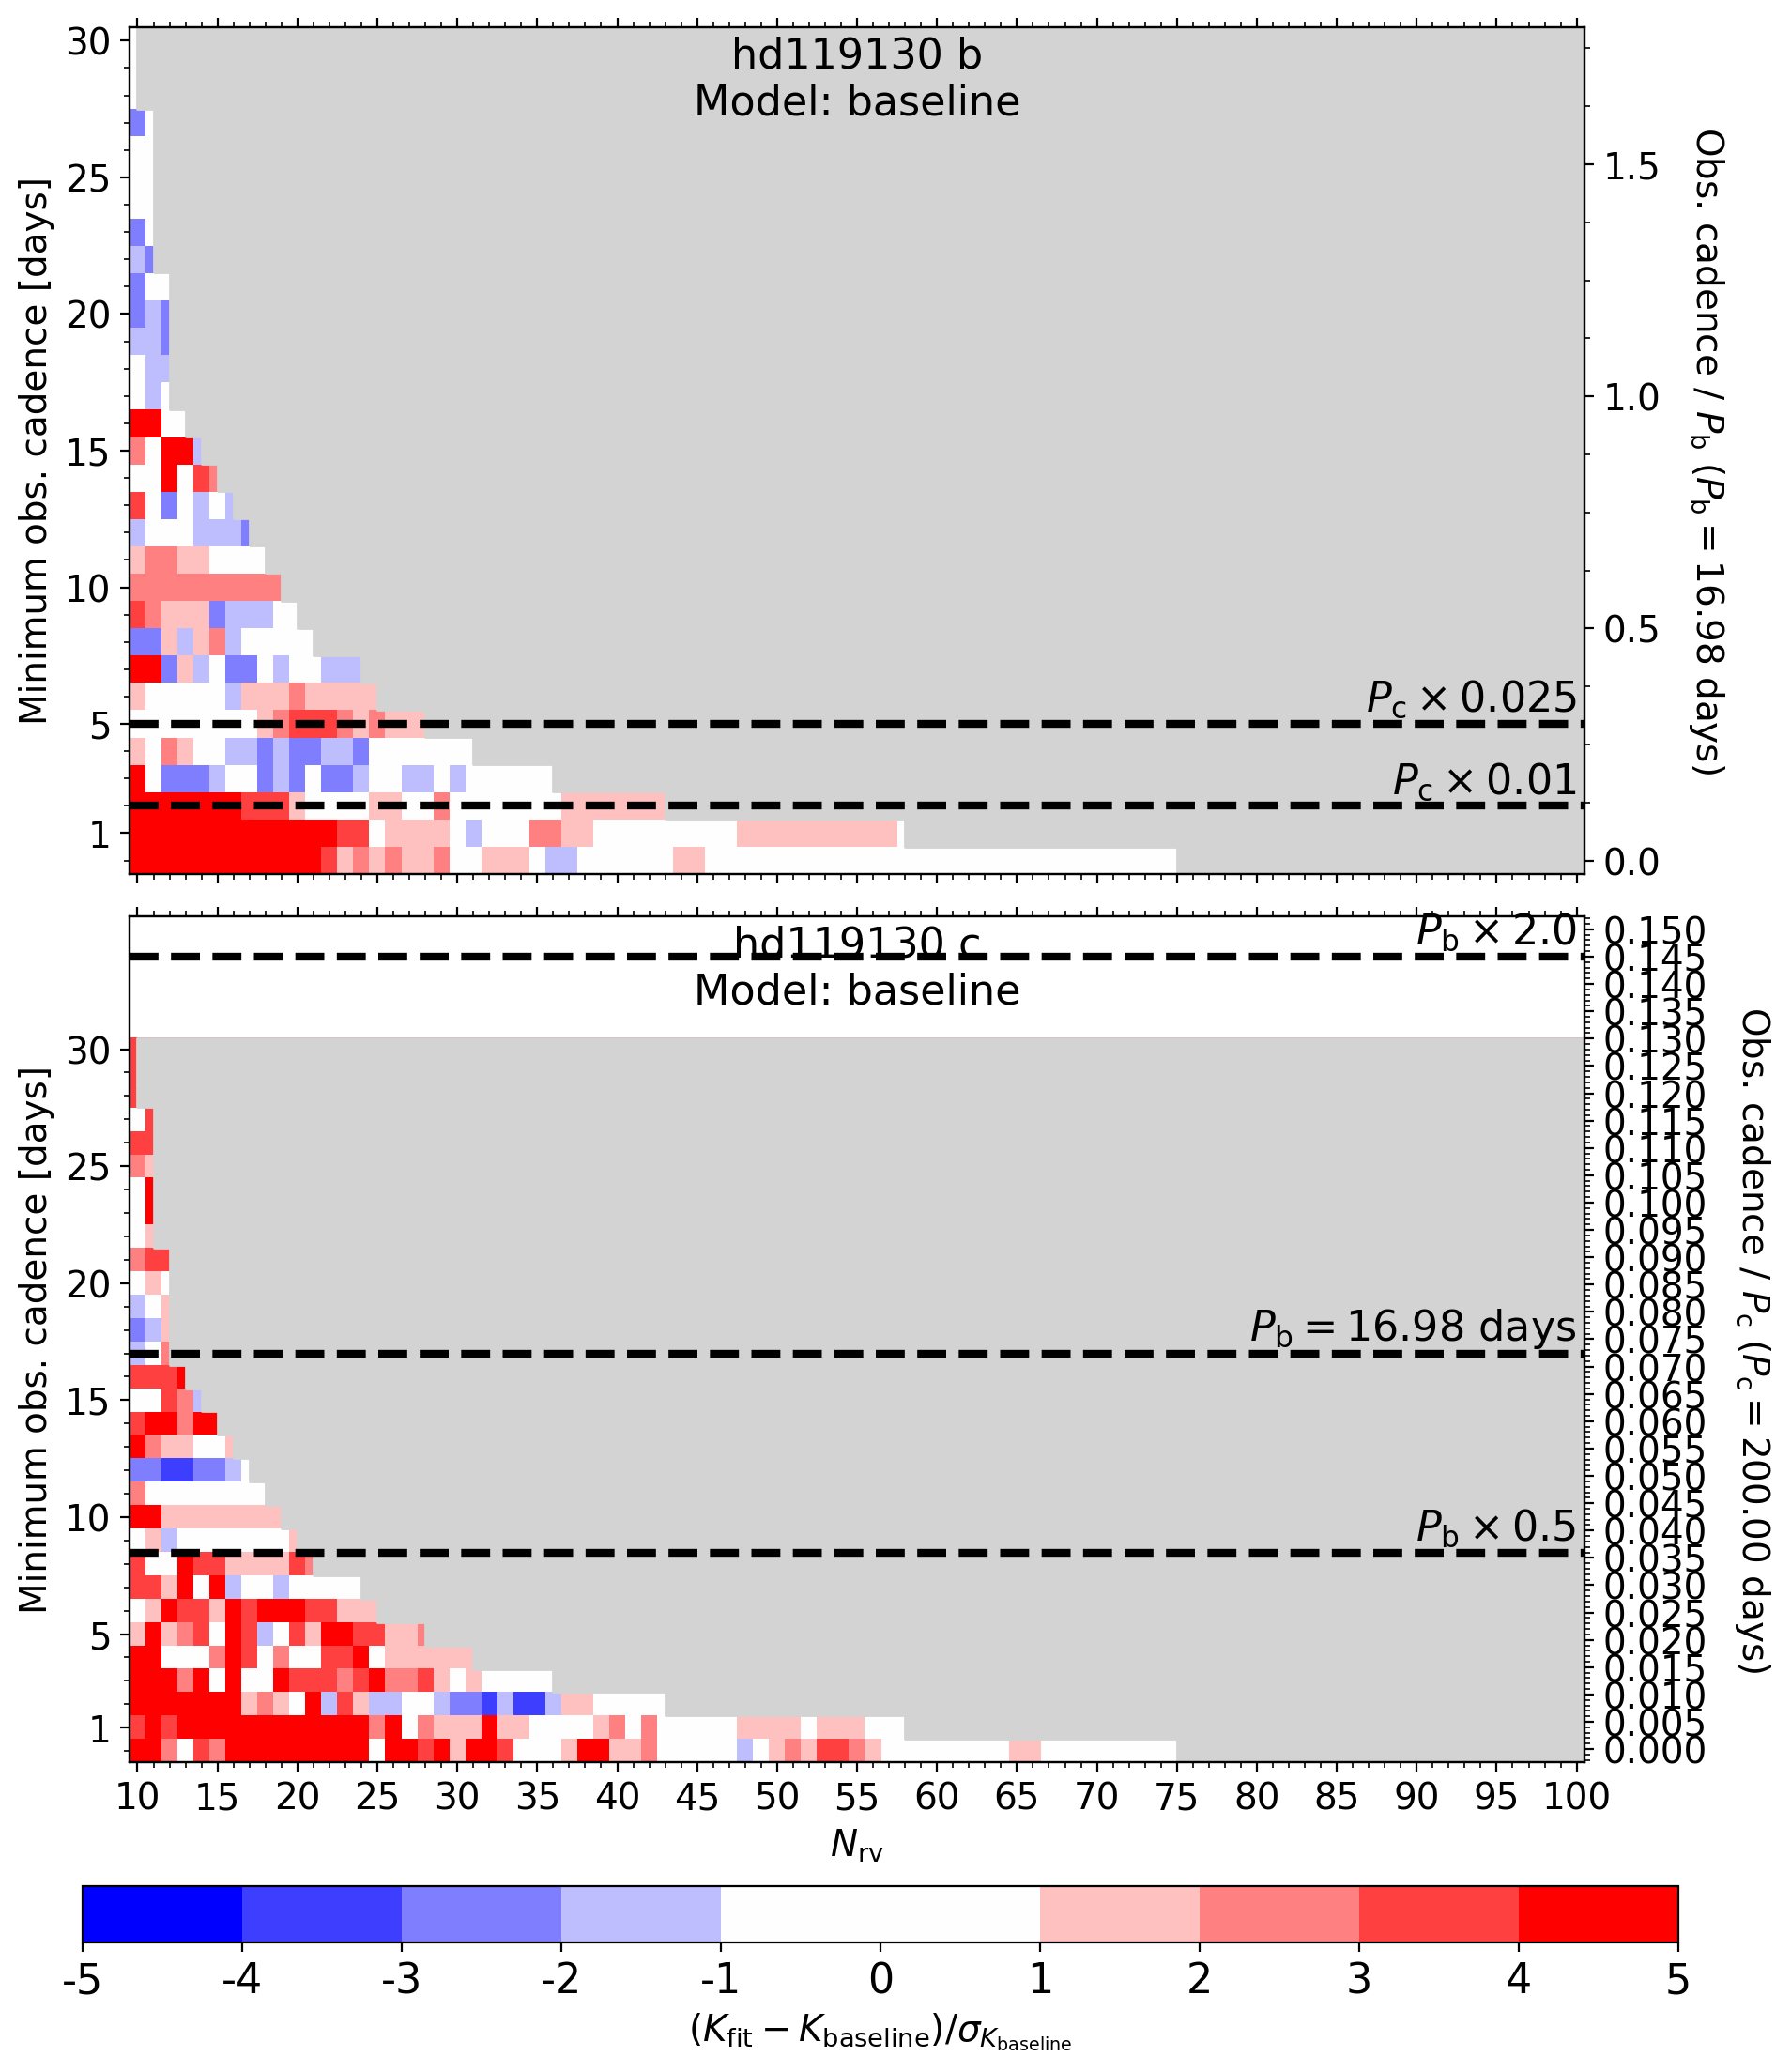

In [32]:
fig_arr, axes_arr = sim_grid.make_grid_plot(ksim_minus_ktruth_over_kerr, cbar_units='diff_over_sigma')

AttributeError: 'numpy.ndarray' object has no attribute 'set_title'

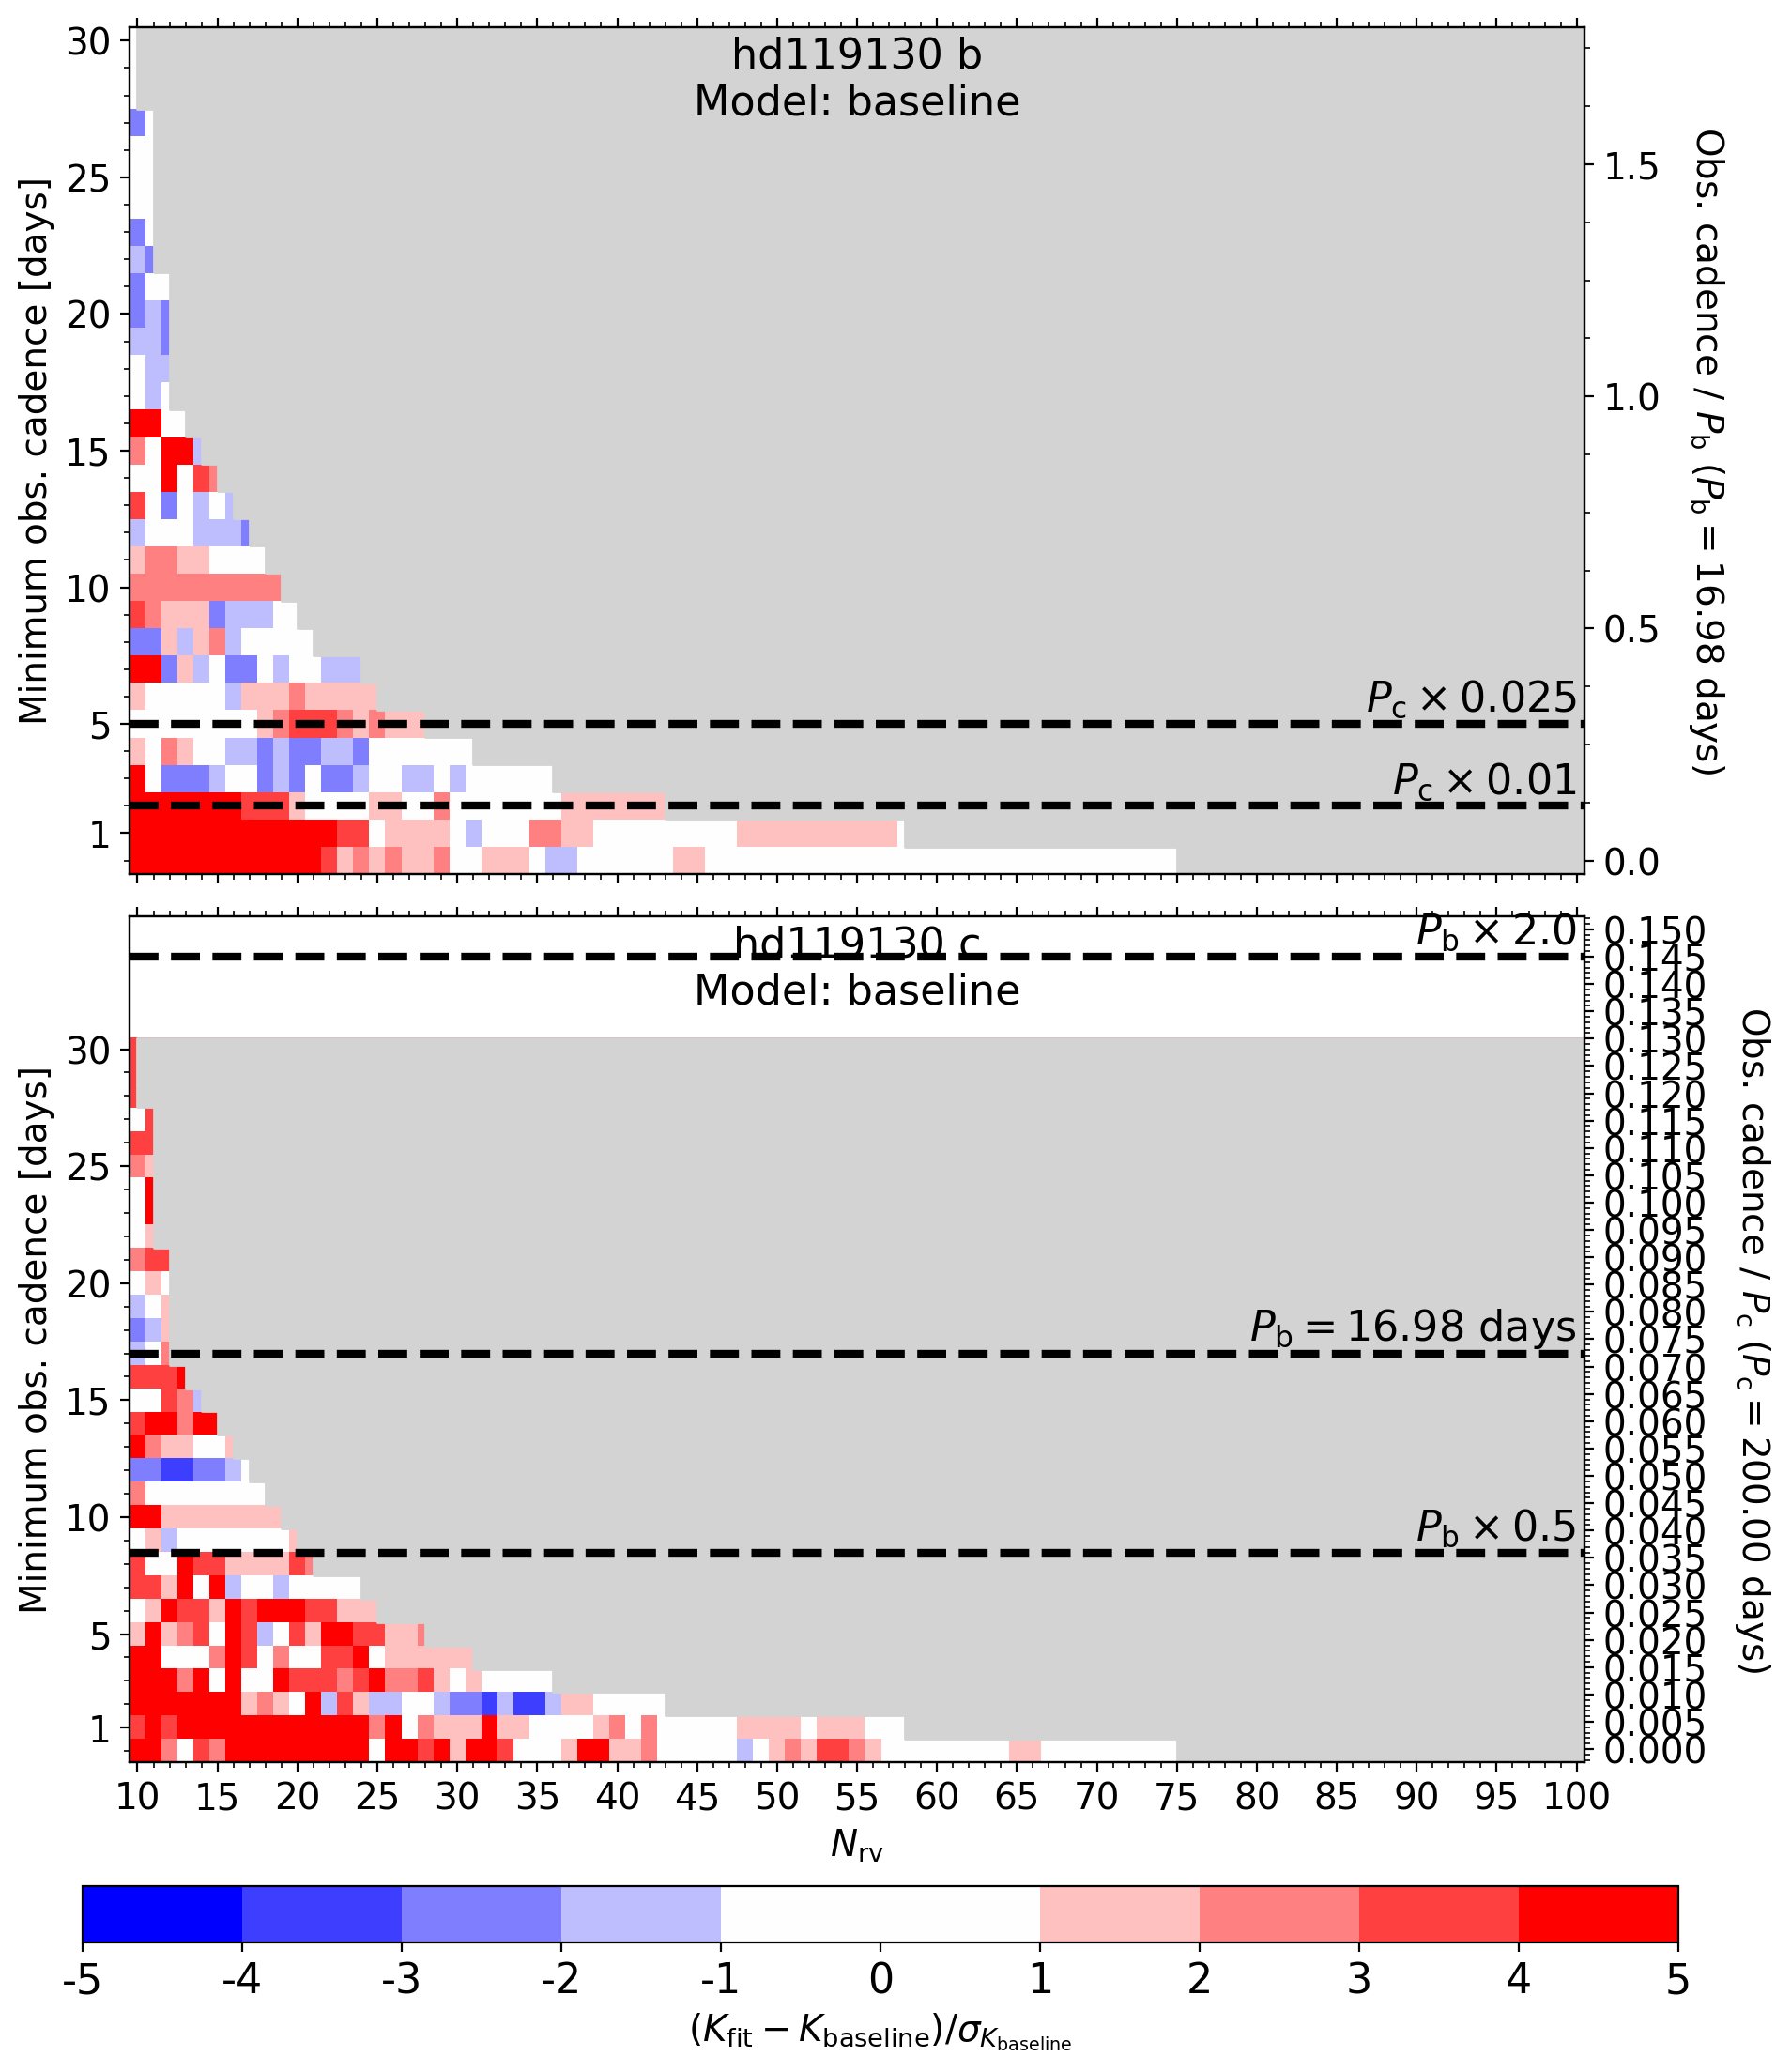

In [35]:
fname = f'{sys_name}/{sys_name}_real_grid_{config_id}_config_planet_b_diff_over_sigma.png'
save_fig_kwargs = {'bbox_inches':'tight', 'dpi':1000, 'facecolor':'white'}
fig, axes = sim_grid.make_grid_plot(ksim_minus_ktruth_over_kerr, cbar_units='diff_over_sigma')
axes[0].set_title('HD 119130 b')
#fig.savefig(fname, **save_fig_kwargs)

# fname = f'{sys_name}/{sys_name}_real_grid_{config_id}_config_planet_c_diff_over_sigma.png'
# axes_arr[1, 0].set_title('Signal c')
# fig_arr[1].savefig(fname, **save_fig_kwargs)

## Plot the RV time series for a single grid cell
Do this to inspect combinations of MOC and $N_{RV}$. When generating your grid, must have `sim_grid.get_ksim_grid(save_posts=True)`

In [44]:
moc = 0
nrv = 18
moc_ind = sim_grid.convert_moc_to_grid_ind(moc)
nrv_ind = sim_grid.convert_nrv_to_grid_ind(nrv)
sim_grid.post_grid[moc_ind, nrv_ind]

parameter                     value      vary
per1                        16.9841       True
tc1                         870.253       True
secosw1                          -0      False
sesinw1                           0      False
k1                          6.03532       True
per2                        199.704       True
tc2                         736.987       True
secosw2                          -0      False
sesinw2                           0      False
k2                          12.8471       True
dvdt                              0      False
curv                              0      False
gamma_CARMENES              11.2389       True
jit_CARMENES                12.2389       True
gamma                     -0.968202       True
jit                         1.86336       True
tp1                         874.499           
e1                                0           
w1                          3.14159           
tp2                         786.913           
e2            

In [45]:
type(sim_grid.post_grid[moc_ind, nrv_ind].likelihood)

radvel.likelihood.RVLikelihood

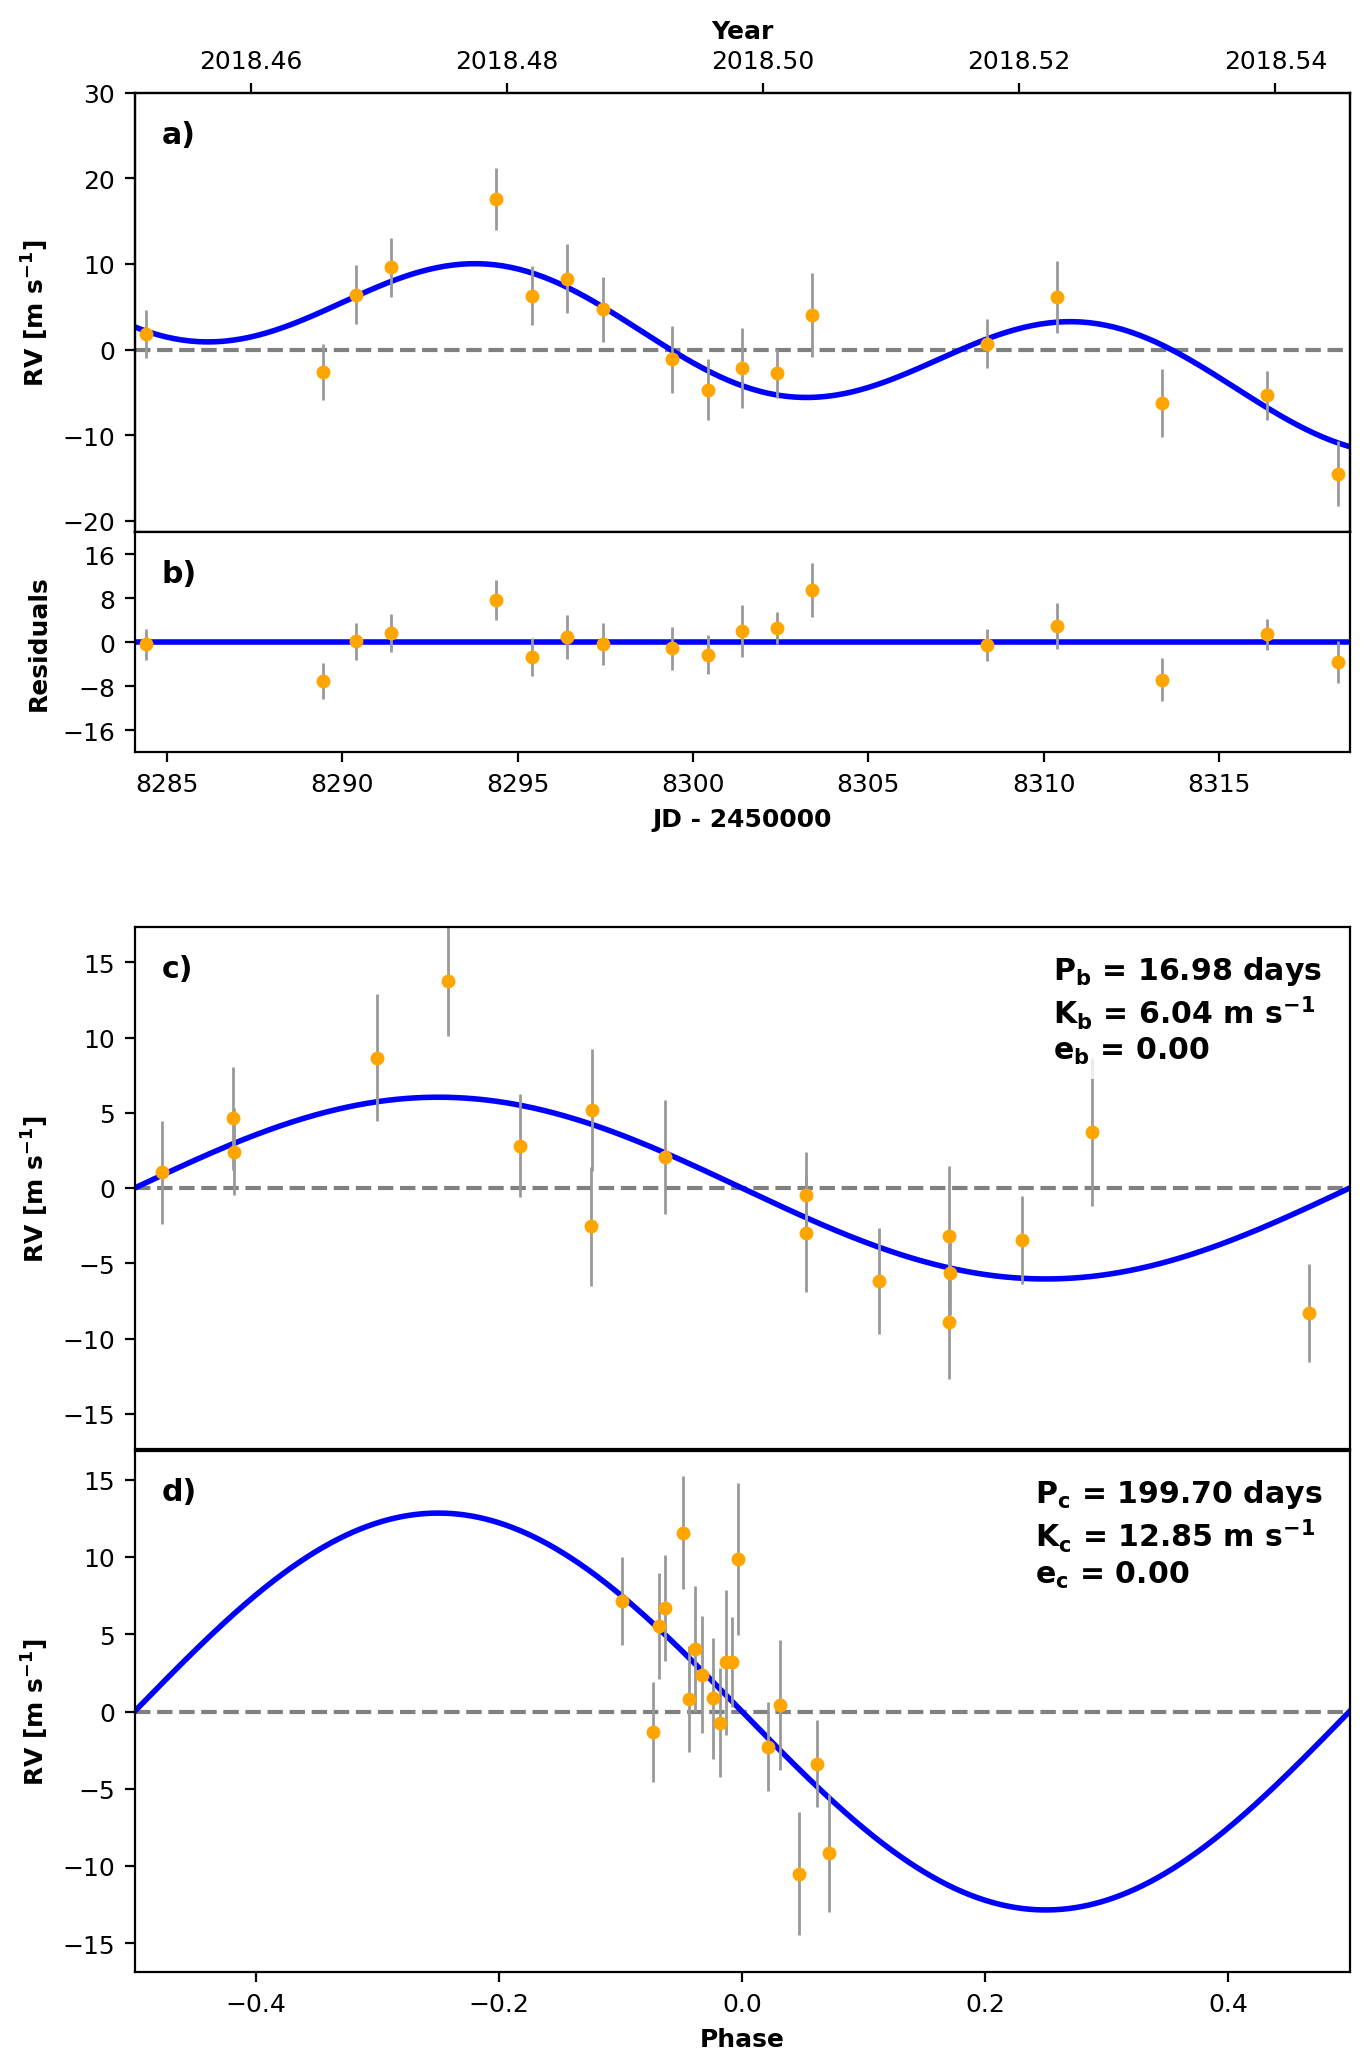

In [46]:
rvplot = orbit_plots.MultipanelPlot(sim_grid.post_grid[moc_ind, nrv_ind], legend=False)
fig, ax = rvplot.plot_multipanel()
# fig.savefig('multipanel_foo.png', bbox_inches='tight', dpi=600, facecolor='white')

## If using a RadVel model that includes a GP

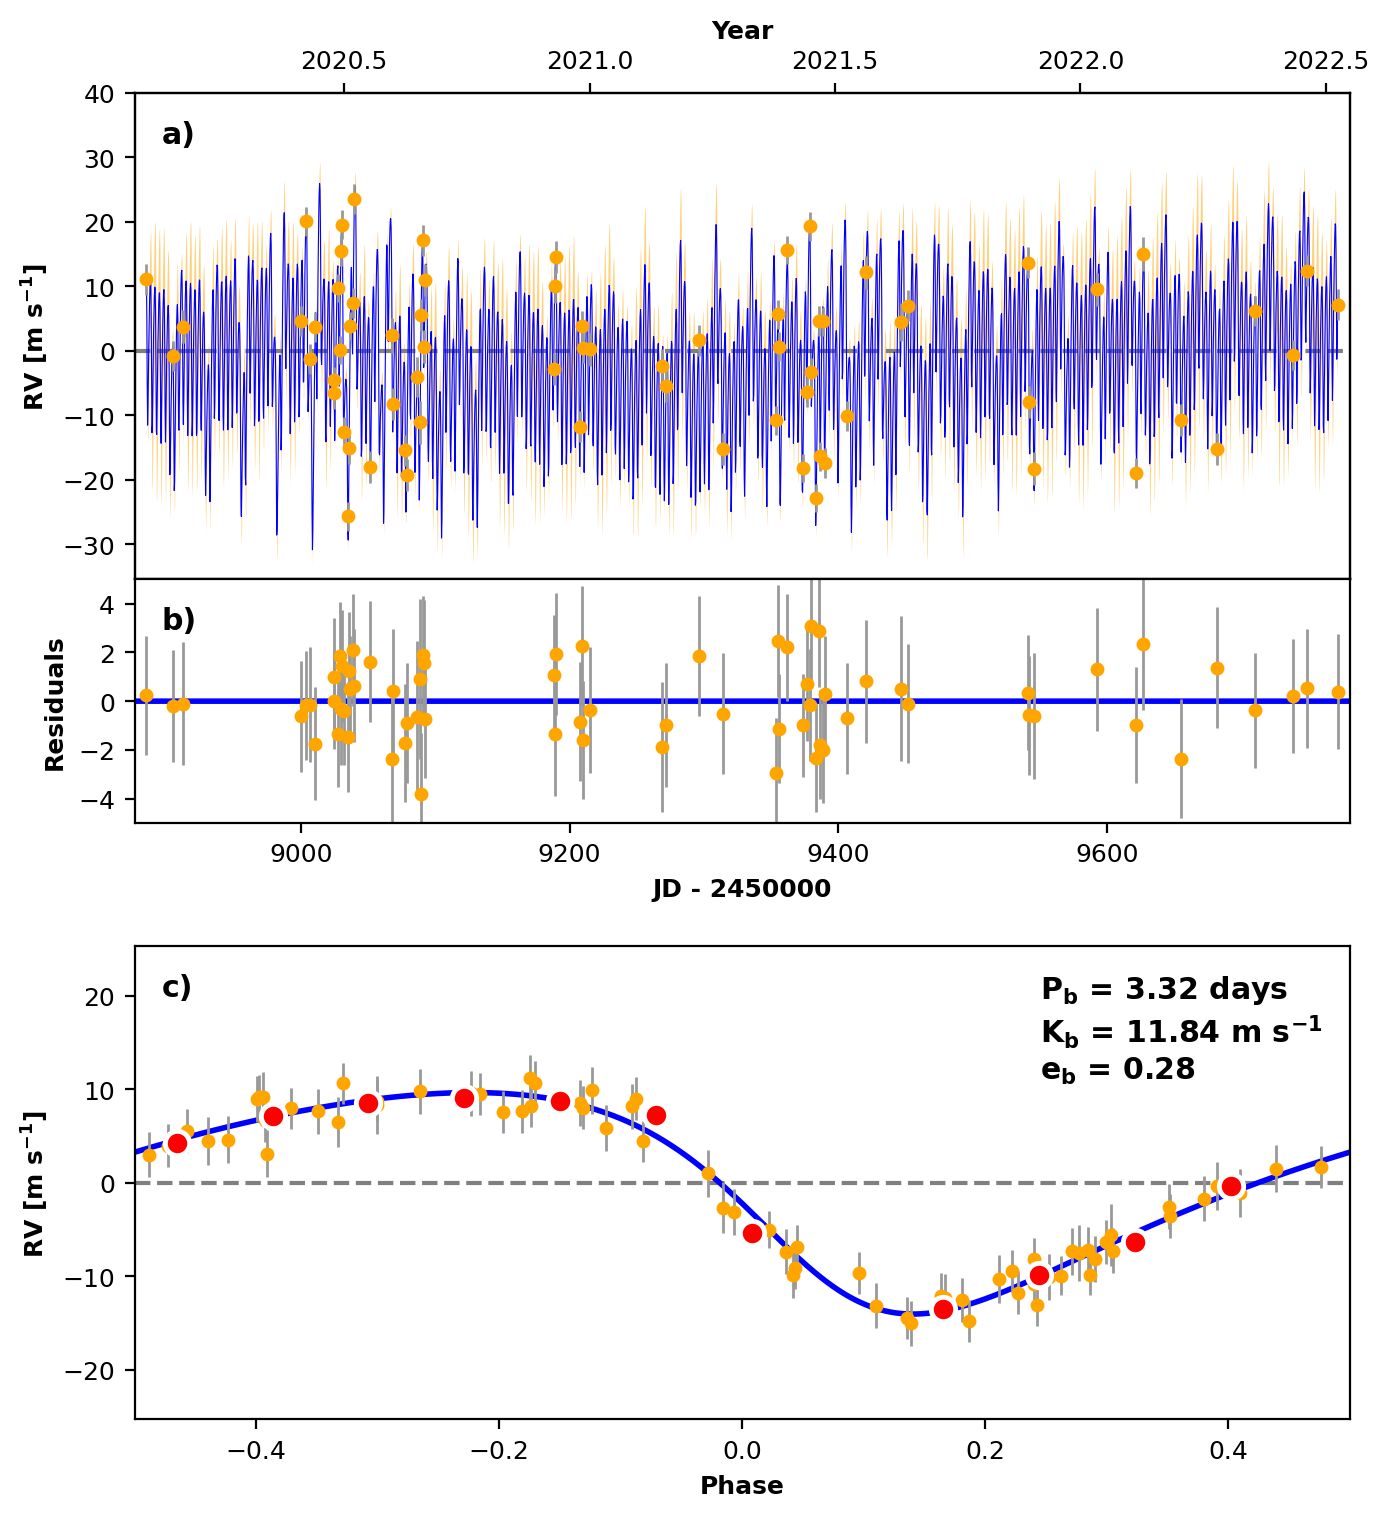

In [45]:
rvplot = orbit_plots.GPMultipanelPlot(sim_grid.post_grid[moc_ind, nrv_ind], legend=False)
rvplot.plot_multipanel()
# fig.savefig('multipanel_foo.png', bbox_inches='tight', dpi=600, facecolor='white')